#CUSTOMER CHURN PREDICTION USING ML

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


#load the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/customer_churn_dataset.csv")
df.head()


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.1,Yes
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.6,Yes
2,9305-CDHLH,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.3,Yes
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,2990.2,Yes
4,0280-CDHVD,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


#BASIC DATA EXPLORATION

In [ ]:
df.columns
df.shape
df.size
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        8 non-null      object 
 1   Gender            8 non-null      object 
 2   SeniorCitizen     8 non-null      int64  
 3   Partner           8 non-null      object 
 4   Dependents        8 non-null      object 
 5   Tenure            8 non-null      int64  
 6   PhoneService      8 non-null      object 
 7   MultipleLines     8 non-null      object 
 8   InternetService   8 non-null      object 
 9   OnlineSecurity    8 non-null      object 
 10  OnlineBackup      8 non-null      object 
 11  DeviceProtection  8 non-null      object 
 12  TechSupport       8 non-null      object 
 13  StreamingTV       8 non-null      object 
 14  StreamingMovies   8 non-null      object 
 15  Contract          8 non-null      object 
 16  PaperlessBilling  8 non-null      object 
 17  P

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,8.0,8.000000,8.000000,8.000000
mean,0.0,31.375000,91.050000,3185.812500
std,0.0,26.901606,19.689138,2831.389455
min,0.0,2.000000,53.850000,108.100000
25%,0.0,6.500000,81.575000,653.125000
50%,0.0,29.000000,99.825000,2770.100000
75%,0.0,51.750000,103.975000,5434.725000
max,0.0,72.000000,110.500000,7200.000000


#DATA CLEANING

In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values
df['TotalCharges'].fillna(0, inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


/tmp/ipython-input-1876620041.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#EXPLORATORY DATA ANALYSIS (EDA)

#CHURN COUNT

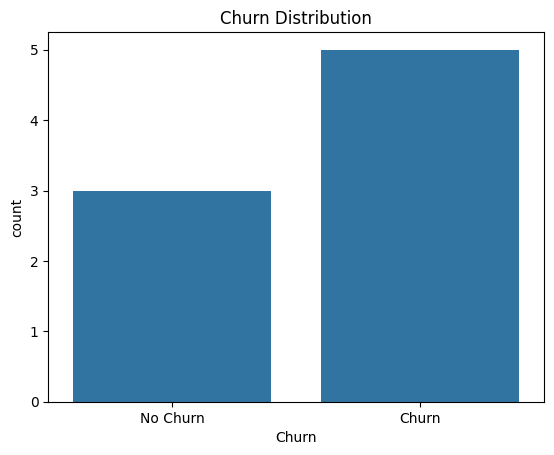

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xticks([0,1], ['No Churn','Churn'])
plt.show()


#GENDER VS CHURN

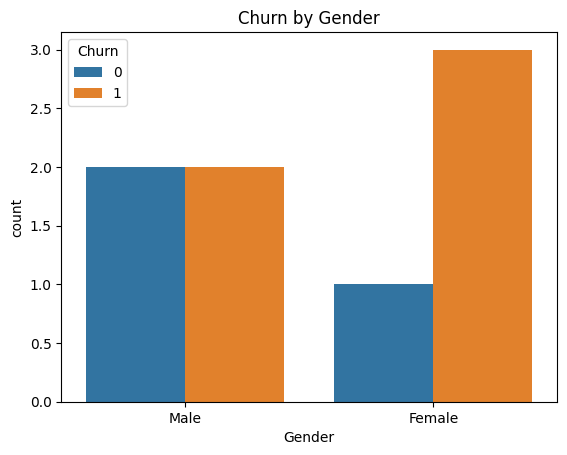

In [ ]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()


#SERVICES OF INTERNET VS CHURN

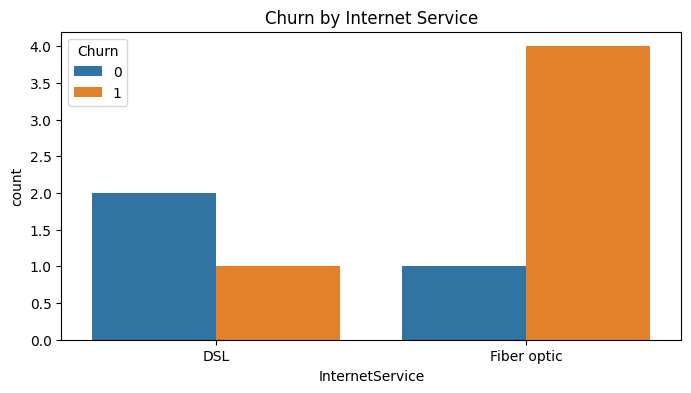

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()


#CHURN VS MONTHLY CHARGES

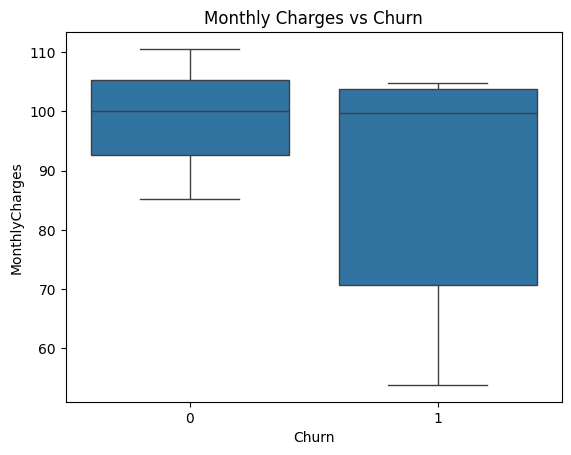

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


#TENURE VS CHURN

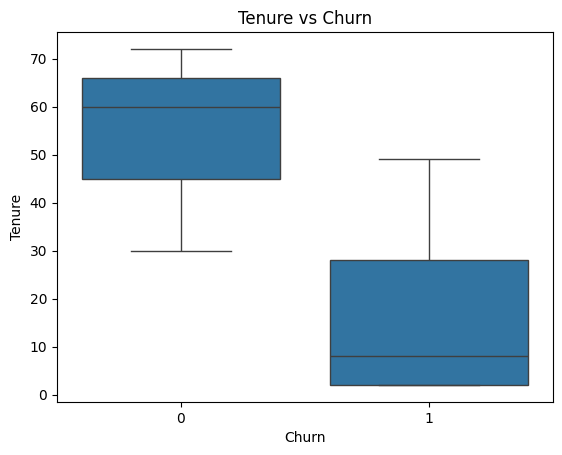

In [ ]:
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


#CORRELATION HEAT MAP

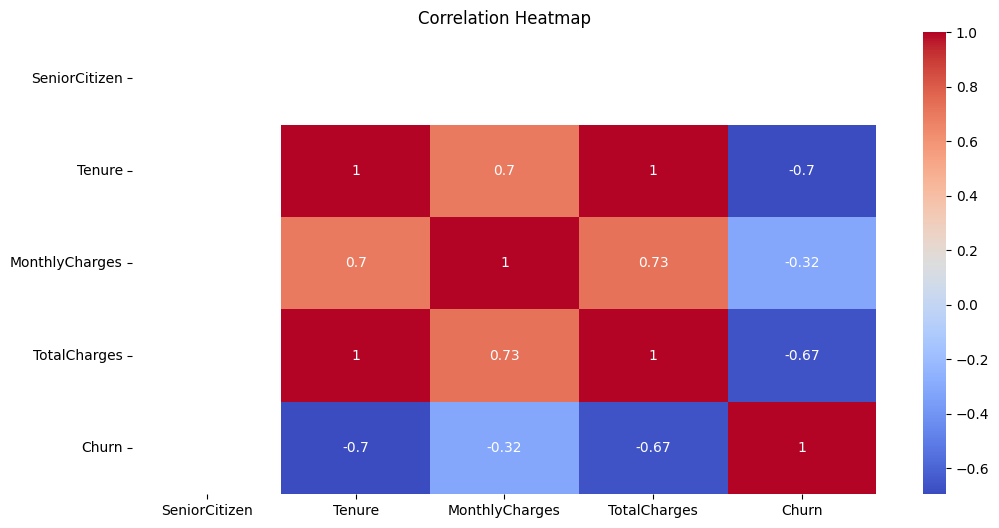

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#ENCODING CATEGORICAL FEATURES

In [ ]:
cat_cols = df.select_dtypes(include='object').columns

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


#FEATURE AND TARGET SELECTION

In [ ]:
X = df.drop(['CustomerID','Churn'], axis=1)
y = df['Churn']


#FEATURE SCALING

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#TRAIN TEST READY DATA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


#LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

ROC-AUC: 1.0


#RANDOM CLASSIFIER

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=6
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

ROC-AUC: 1.0


#LOGISTIC REGRESSION

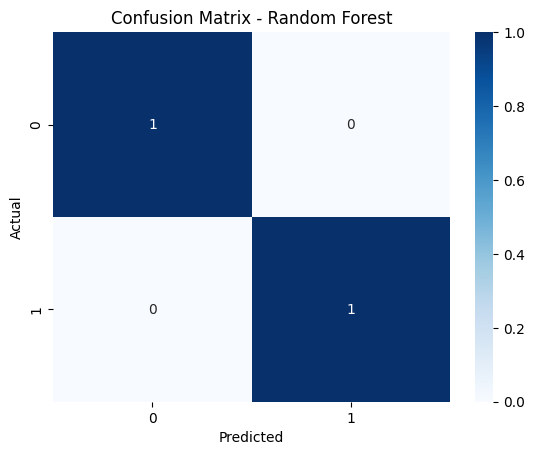

In [ ]:
cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#RANDOM CLASSIFIER

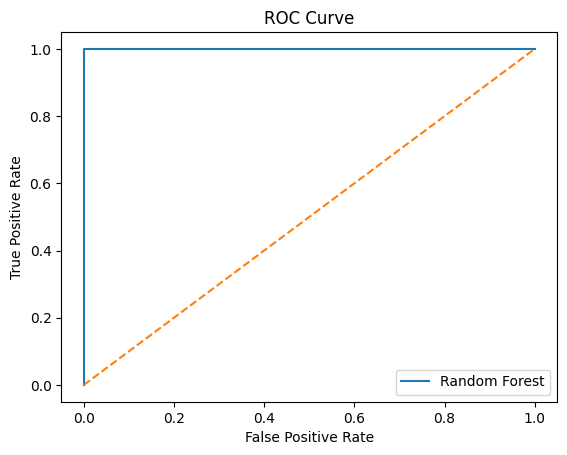

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_prob)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#CONFUSION MATRIX

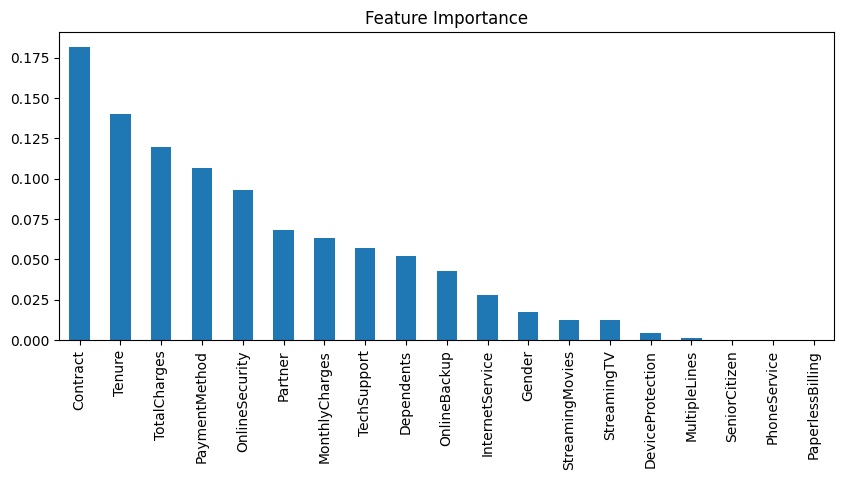

In [ ]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(10,4))
plt.title("Feature Importance")
plt.show()


#FINAL INSIGHTS

Month-to-month contracts → highest churn
✔ High monthly charges → higher churn risk
✔ Low tenure customers → most vulnerable
✔ Random Forest outperforms Logistic Regression
✔ Contract type & tenure are top predictors